In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

# cross validation
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# evaluate performance 
from sklearn.metrics import mean_squared_error, r2_score

# persist model for future use
import joblib

In [178]:
# loading the data 
data = pd.read_csv(r"/Users/aditijain/Desktop/UW/activities/python:ML/projects/heart-disease/processed.cleveland.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [179]:
data.shape

(303, 14)

In [180]:
""" 
features : 

1. #3  (age)      : age in years
2. #4  (sex)      : (1 = male; 0 = female)
3. #9  (cp)       : chest pain type 
                        Value 1: typical angina
                        Value 2: atypical angina 
                        Value 3: non-anginal pain 
                        Value 4: asymptomatic
4. #10 (trestbps) : resting blood pressure (in mm Hg on admission to the hospital)
5. #12 (chol)     : serum cholestoral in mg/dl
6. #16 (fbs)      : (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
7. #19 (restecg)  : resting electrocardiographic results
                        Value 0: normal
                        Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                            elevation or depression of > 0.05 mV)
                        Value 2: showing probable or definite left ventricular hypertrophy
                            by Estes' criteria
8. #32 (thalach)  : maximum heart rate achieved
9. #38 (exang)    : exercise induced angina (1 = yes; 0 = no)
10. #40 (oldpeak) : ST depression induced by exercise relative to rest
11. #41 (slope)   : the slope of the peak exercise ST segment
                        Value 1: upsloping
                        Value 2: flat
                        Value 3: downsloping
12. #44 (ca)      : number of major vessels (0-3) colored by flourosopy 
13. #51 (thal)    : 3 = normal; 6 = fixed defect; 7 = reversable defect
14. #58 (disease)     : diagnosis of heart disease -- predicted attribute (0-4)
                        0 = no presence
"""

"\n1. #3  (age)      : age in years\n2. #4  (sex)      : (1 = male; 0 = female)\n3. #9  (cp)       : chest pain type \n                        Value 1: typical angina\n                        Value 2: atypical angina \n                        Value 3: non-anginal pain \n                        Value 4: asymptomatic\n4. #10 (trestbps) : resting blood pressure (in mm Hg on admission to the hospital)\n5. #12 (chol)     : serum cholestoral in mg/dl\n6. #16 (fbs)      : (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)\n7. #19 (restecg)  : resting electrocardiographic results\n                        Value 0: normal\n                        Value 1: having ST-T wave abnormality (T wave inversions and/or ST \n                            elevation or depression of > 0.05 mV)\n                        Value 2: showing probable or definite left ventricular hypertrophy\n                            by Estes' criteria\n8. #32 (thalach)  : maximum heart rate achieved\n9. #38 (exang)    : exer

In [181]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,disease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='disease', ylabel='age'>,
        <AxesSubplot:xlabel='trestbps', ylabel='age'>,
        <AxesSubplot:xlabel='chol', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='disease'>,
        <AxesSubplot:xlabel='disease', ylabel='disease'>,
        <AxesSubplot:xlabel='trestbps', ylabel='disease'>,
        <AxesSubplot:xlabel='chol', ylabel='disease'>],
       [<AxesSubplot:xlabel='age', ylabel='trestbps'>,
        <AxesSubplot:xlabel='disease', ylabel='trestbps'>,
        <AxesSubplot:xlabel='trestbps', ylabel='trestbps'>,
        <AxesSubplot:xlabel='chol', ylabel='trestbps'>],
       [<AxesSubplot:xlabel='age', ylabel='chol'>,
        <AxesSubplot:xlabel='disease', ylabel='chol'>,
        <AxesSubplot:xlabel='trestbps', ylabel='chol'>,
        <AxesSubplot:xlabel='chol', ylabel='chol'>]], dtype=object)

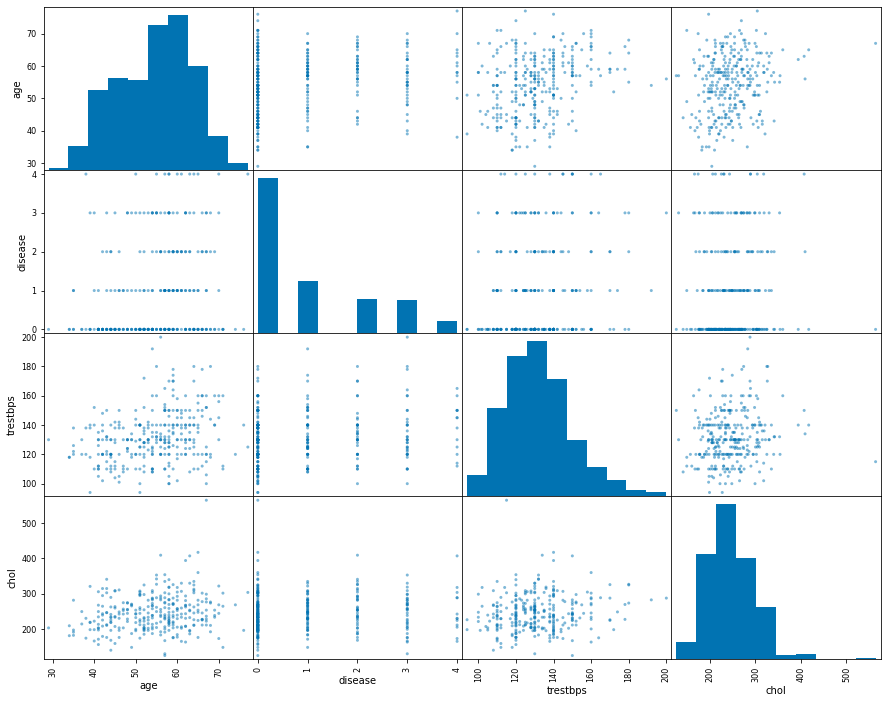

In [448]:
# matrix of the four attributes plotted against one another
from pandas.plotting import scatter_matrix
attributes = ["age", "disease","trestbps", "chol"]
scatter_matrix(data[attributes], figsize=(15,12))

Text(0.5, 0, 'features')

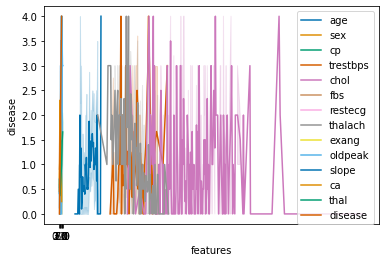

In [446]:
# plot of oldpeak vs disease
import seaborn as sns
sns.set_palette("colorblind")
for feature in data.columns:
    sns.lineplot(x=feature, y='disease', data=data)
plt.legend(labels=data.columns)
plt.xlabel('features')

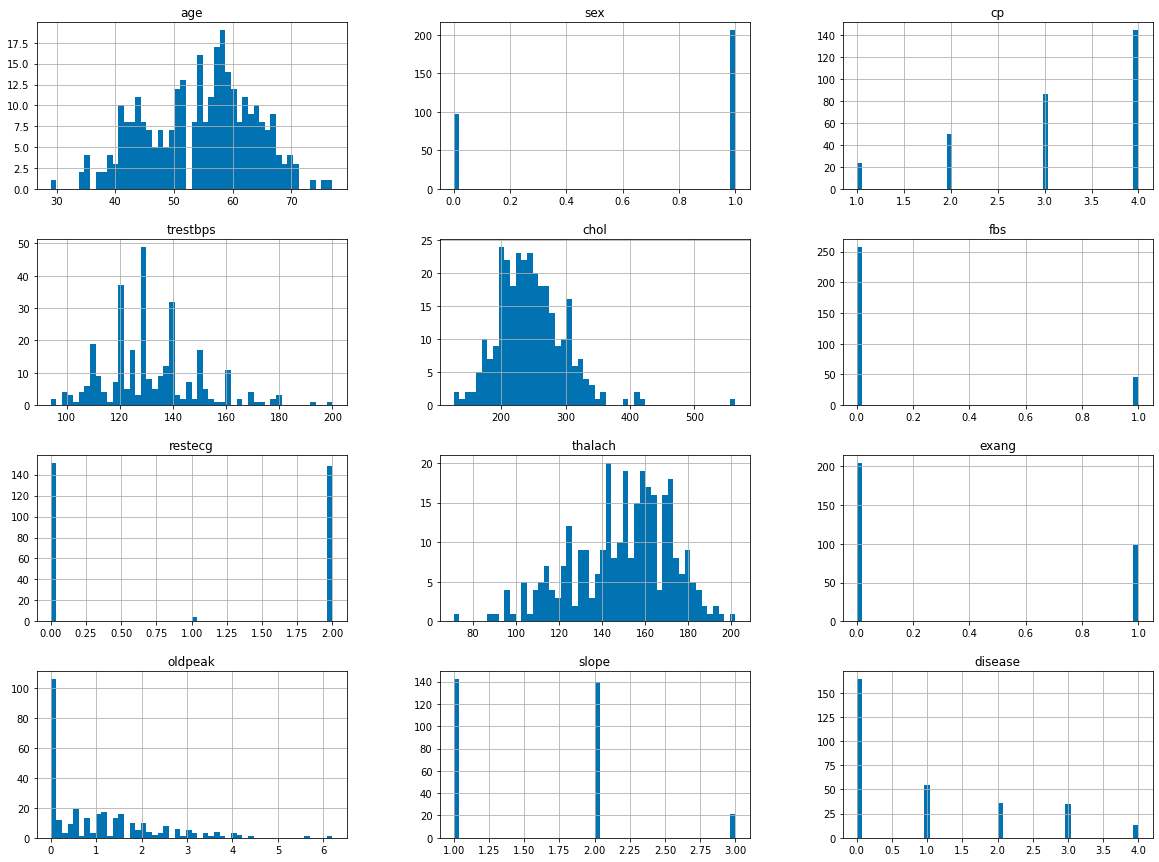

In [447]:
data.hist(bins=50, figsize=(20,15)) # plots the frequency of each number
plt.show()

<AxesSubplot:xlabel='trestbps', ylabel='disease'>

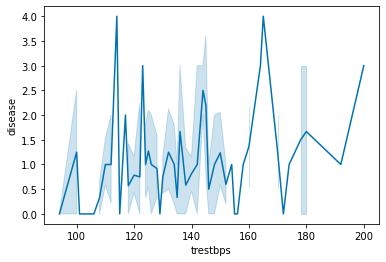

In [443]:
sns.lineplot(x='trestbps', y='disease', data=data)

In [420]:
data[data.disease == 4].head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
24,60.0,1.0,4.0,130.0,206.0,0.0,2.0,132.0,1.0,2.4,2.0,2.0,7.0,4
40,65.0,0.0,4.0,150.0,225.0,0.0,2.0,114.0,0.0,1.0,2.0,3.0,7.0,4
45,58.0,1.0,3.0,112.0,230.0,0.0,2.0,165.0,0.0,2.5,2.0,1.0,7.0,4
47,50.0,1.0,4.0,150.0,243.0,0.0,2.0,128.0,0.0,2.6,2.0,0.0,7.0,4
121,63.0,0.0,4.0,150.0,407.0,0.0,2.0,154.0,0.0,4.0,2.0,3.0,7.0,4


In [360]:
# removed ca and thal bc they were objects instead of float (data.info())
X = data.drop(['disease','ca','thal'], axis=1) 
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
122,51.0,1.0,3.0,100.0,222.0,0.0,0.0,143.0,1.0,1.2,2.0
175,57.0,1.0,4.0,152.0,274.0,0.0,0.0,88.0,1.0,1.2,2.0
272,46.0,1.0,4.0,140.0,311.0,0.0,0.0,120.0,1.0,1.8,2.0
278,57.0,1.0,2.0,154.0,232.0,0.0,2.0,164.0,0.0,0.0,1.0
145,47.0,1.0,3.0,108.0,243.0,0.0,0.0,152.0,0.0,0.0,1.0


In [106]:
y = data.disease

In [233]:
# splitting data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=12, stratify=y)

In [374]:
# Preprocess data : preprocessing.normalize(), preprocessing.MinMaxScaler()
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)

In [410]:
X_scaled.mean(axis=0)

array([ 1.32125715e-16,  8.07434927e-17, -1.37630953e-16,  2.93612701e-16,
        1.66074684e-16, -1.46806350e-17, -3.67015876e-17,  1.61486985e-16,
       -7.70733339e-17,  1.46806350e-16, -7.34031752e-17])

In [411]:
X_scaled_test = scaler.transform(X_test)

In [456]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
lr.fit(X_scaled, y_train)
lr.score(X_scaled_test, y_test)

0.5737704918032787

In [412]:
# Support Vector Classifier - finding a middle ground that a line can be 
# drawn that maximizes the ditance betwween the attributes
from sklearn import svm
model = svm.SVC(random_state=12) 

In [413]:
model.fit(X_scaled, y_train)
y_pred = model.predict(X_scaled_test)

In [414]:
model.score(X_scaled_test,y_test)

0.5409836065573771

In [415]:
print(r2_score(y_test, y_pred))

-0.07535430349118544


In [348]:
# GaussianProcessClassifier : 
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
model = GaussianProcessClassifier(kernel = 1.0*RBF(5.0), random_state=12).fit(X_train, y_train)

/Users/aditijain/opt/miniconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


In [349]:
model.score(X_test,y_test)

0.5737704918032787

In [350]:
# KNeighborsClassifier
from sklearn import neighbors
model = neighbors.KNeighborsClassifier(n_neighbors=120).fit(X_norm, y_train)

In [351]:
model.score(X_test,y_test)

0.5409836065573771

In [352]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10, random_state=12, criterion='entropy').fit(X_train, y_train)

In [353]:
model.score(X_test,y_test)

0.5573770491803278

In [354]:
# MultinomialNB
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB(alpha=4).fit(X_norm, y_train)

In [355]:
model.score(X_test,y_test)

0.5409836065573771

In [356]:
# preprocessing
# classification model that would best suit the goal